In [190]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [191]:
df = pd.read_excel('station_60.xlsx', header=0)

In [192]:
f1 = df['Duration'].values
f2 = df['count'].values
# f3 = df['Alarm'].values

f1_log = np.log(df['Duration'].values, dtype='float64')
f2_log = np.log(df['count'].values, dtype='float64')

In [193]:
df.head()

,Event name,Duration,count
0,1754060R10Com.AC_R10InterlockReq1_2,37442,467
1,1754060R03Alarm.AC_FPErrNoTCPCompActParMis,20011,64
2,1754501M10.AC_KeepPosResAlm,15397,1270
3,1754060R08Alarm.AC_FPErrNoTCPCompActParMis,14267,50
4,1754060R06Alarm.AC_FPErrNoTCPCompActParMis,10993,39


In [194]:
X = np.array(list(zip(f1_log,f2_log)))
# X_withlabel = np.array(list(zip(f1_log,f2_log, f3)))

[[5.90963206 0.63767339]
 [8.5449434  4.34772222]
 [7.3285857  2.17269488]
 [1.90256233 0.70722472]
 [4.1950047  0.31720841]
 [4.83449941 1.93349649]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 1 1 1 1 1 2 1 1 1 2 2 1 2 2 1 2 2 2 2
 2 1 2 2 2 2 2 1 2 2 2 1 2 1 2 2 2 2 1 2 2 2 2 1 2 2 2 2 2 2 0 2 1 2 2 2 2
 1 2 0 2 2 2 2 2 2 0 2 0 0 2 0 0 2 0 0 2 2 0 0 0 0 2 2 2 0 0 2 2 0 2 2 2 0
 2 0 0 5 0 0 5 0 0 5 5 5 0 0 0 5 0 0 5 0 0 5 0 0 0 5 5 0 0 0 0 0 0 5 5 0 5
 0 5 0 5 0 0 0 5 0 5 0 4 5 5 5 4 0 0 4 5 4 4 5 5 4 4 5 5 4 4 4 4 5 4 5 4 4
 4 5 4 5 4 5 4 4 4 4 4 5 4 4 4 4 5 4 4 5 5 5 5 5 5 4 4 4 5 4 4 5 5 5 4 5 5
 4 4 4 4 5 4 4 4 4 5 4 4 4 4 4 4 4 4 4 4 5 4 4 3 4 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


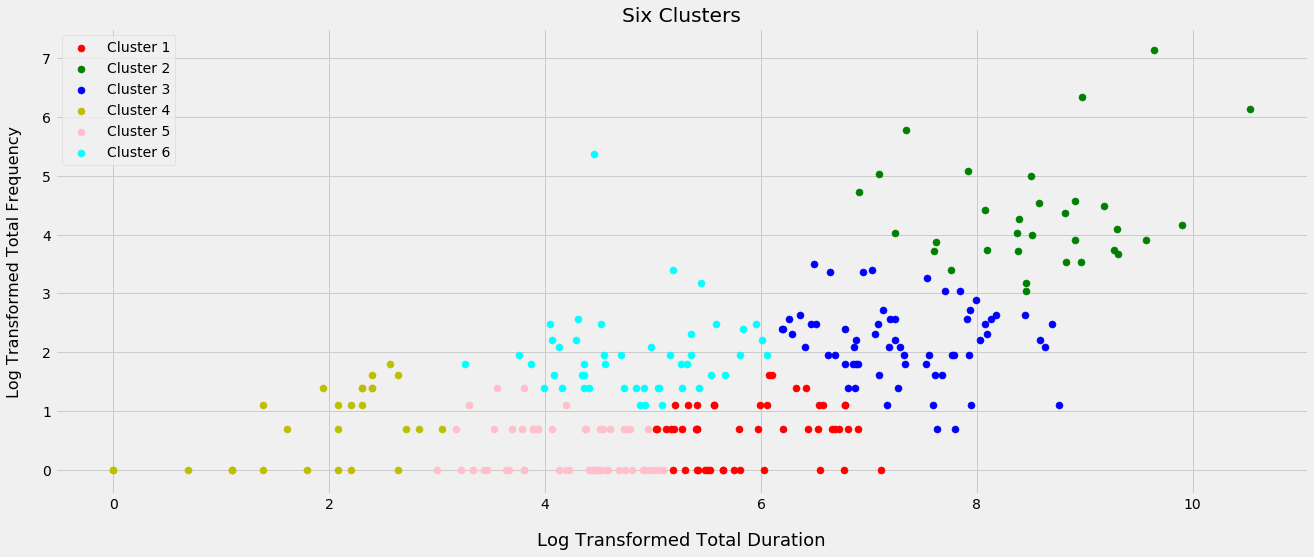

In [195]:
#X=np.matrix(zip(f1,f2))
# X = df.drop(['Event name'], axis=1)

km = KMeans(n_clusters=6)
km.fit(X)

centers = km.cluster_centers_
print(centers)
print(km.labels_)

# centroids = km.centroids
fig, ax = plt.subplots(figsize=(20, 8))
plt.xlabel('Log Transformed Total Duration', fontsize=18, labelpad=20)
plt.ylabel('Log Transformed Total Frequency', fontsize=16, labelpad=20)
plt.title("Six Clusters")
colors = ['r', 'g', 'b', 'y', 'pink', 'cyan']
for i in range(6):
    points = np.array([X[j] for j in range(len(X)) if km.labels_[j] == i])
    ax.scatter(points[:, 0], points[:, 1], s=50, c=colors[i])

cluster_name = ["Cluster 1","Cluster 2","Cluster 3", "Cluster 4", "Cluster 5", "Cluster 6"]
# for i,col in enumerate(colors):
ax.legend(cluster_name)

# plt.scatter(centers[0, 0], centers[0, 1], c='black', s=20201, alpha=0.5, label=colors, marker="o")
# plt.scatter(centers[:, 0], centers[:, 1], c='black', s=20000, alpha=0.5, label=colors, marker="s")
# for i, txt in enumerate(km.cluster_centers_):
#     ax.annotate(cluster_name[i], (km.cluster_centers_[i,0], km.cluster_centers_[i,1]))

# plt.savefig('4clusters')

In [196]:
clusters = [i+1 for i in km.labels_]
df['cluster']=clusters

In [198]:
df.to_excel("station_60_clustered_6.xlsx") # save dist matrix to a xlsx.